<a href="https://colab.research.google.com/github/Saf02Sam/general/blob/main/Saffa_Samreen_assignment2_problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#q1
1- Modify your create_nn method to use Mini-batch gradient descent (1pt) .

Streaming output truncated to the last 5000 lines.
Iteration 0, Batch 52/100: Batch Loss = 1.3671
Iteration 0, Batch 53/100: Batch Loss = 1.3672
Iteration 0, Batch 54/100: Batch Loss = 1.3561
Iteration 0, Batch 55/100: Batch Loss = 1.3582
Iteration 0, Batch 56/100: Batch Loss = 1.3540
Iteration 0, Batch 57/100: Batch Loss = 1.3511
Iteration 0, Batch 58/100: Batch Loss = 1.3652
Iteration 0, Batch 59/100: Batch Loss = 1.3547
Iteration 0, Batch 60/100: Batch Loss = 1.3605
Iteration 0, Batch 61/100: Batch Loss = 1.3449
Iteration 0, Batch 62/100: Batch Loss = 1.3521
Iteration 0, Batch 63/100: Batch Loss = 1.3748
Iteration 0, Batch 64/100: Batch Loss = 1.3629
Iteration 0, Batch 65/100: Batch Loss = 1.3621
Iteration 0, Batch 66/100: Batch Loss = 1.3674
Iteration 0, Batch 67/100: Batch Loss = 1.3568
Iteration 0, Batch 68/100: Batch Loss = 1.3544
Iteration 0, Batch 69/100: Batch Loss = 1.3486
Iteration 0, Batch 70/100: Batch Loss = 1.3569
Iteration 0, Batch 71/100: Batch Loss = 1.3655
Iteration

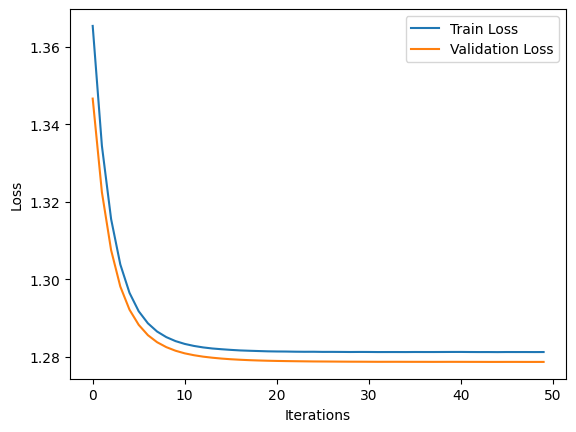

Test Accuracy: 39.00%
Sample 0:
  Features: [ 0.23460178  0.36875884 -0.66104846 -0.64409844 -0.79400121 -0.51824907
  0.11646977 -0.72303939 -1.1813074 ]
  True Label: 0
  Predicted Label: 0

Sample 1:
  Features: [-1.26743862  0.46932479 -0.50321423 -0.69150571 -0.13393883 -0.74244565
 -1.02049155  1.16992062  0.31553988]
  True Label: 1
  Predicted Label: 0

Sample 2:
  Features: [ 1.23596204  1.10414735  0.73922446  1.219372    2.1259358   1.05112697
  1.82191174 -1.30762998  0.90126273]
  True Label: 3
  Predicted Label: 0

Sample 3:
  Features: [ 0.23460178  1.17957181 -0.53963751 -0.42164893 -0.38006378  0.42337655
 -0.1769396  -0.05493586  0.28299972]
  True Label: 3
  Predicted Label: 0

Sample 4:
  Features: [ 0.48494184  1.79553826  0.03099394  0.23840615  0.97362349  0.90166258
  0.42821722 -0.91790292  0.51728886]
  True Label: 1
  Predicted Label: 0



In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load dataset
dataset = pd.read_csv("/content/updated_pollution_dataset.csv")

# Split dataset into train, validation, and test sets
train_test, val = train_test_split(dataset, test_size=0.2, random_state=1)
train, test = train_test_split(train_test, test_size=0.2, random_state=1)

# Scale features
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train.iloc[:, :-1])
test_scaled = scaler.transform(test.iloc[:, :-1])
val_scaled = scaler.transform(val.iloc[:, :-1])

# One-hot encode labels
encoder = OneHotEncoder()
train_labels = encoder.fit_transform(train.iloc[:, -1].values.reshape(-1, 1))
val_labels = encoder.transform(val.iloc[:, -1].values.reshape(-1, 1))
test_labels = encoder.transform(test.iloc[:, -1].values.reshape(-1, 1))

# Transpose data for neural network
train_X = train_scaled.T
train_Y = train_labels.toarray().T
val_X = val_scaled.T
val_Y = val_labels.toarray().T
test_X = test_scaled.T
test_Y = test_labels.toarray().T

# Print shapes
print("Train X shape:", train_X.shape)
print("Train Y shape:", train_Y.shape)
print("Validation X shape:", val_X.shape)
print("Validation Y shape:", val_Y.shape)
print("Test X shape:", test_X.shape)
print("Test Y shape:", test_Y.shape)



# Initialize parameters for multiple hidden layers
def initialize_parameters(nx, nh, ny):
    tf.random.set_seed(1)
    W = []
    b = []

    for i in range(len(nh)):
        if i == 0:
            W.append(tf.Variable(tf.random.uniform(shape=(nh[i], nx), minval=-0.01, maxval=0.01)))
        else:
            W.append(tf.Variable(tf.random.uniform(shape=(nh[i], nh[i - 1]), minval=-0.01, maxval=0.01)))
        b.append(tf.Variable(tf.zeros(shape=(nh[i], 1))))

    W2 = tf.Variable(tf.random.uniform(shape=(ny, nh[-1]), minval=-0.01, maxval=0.01))
    b2 = tf.Variable(tf.zeros(shape=(ny, 1)))

    parameters = {"W": W,
                  "b": b,
                  "W2": W2,
                  "b2": b2}
    return parameters

# Log-softmax for numerical stability
def log_softmax(x):
    x_max = tf.reduce_max(x, axis=0, keepdims=True)
    return x - x_max - tf.math.log(tf.reduce_sum(tf.exp(x - x_max), axis=0, keepdims=True))

# Forward pass with multiple hidden layers
def forward_pass(parameters, X):
    X = tf.cast(X, tf.float32)
    Z = []
    A = [X]

    for i in range(len(parameters["W"])):
        Z.append(tf.matmul(parameters["W"][i], A[-1]) + parameters["b"][i])
        A.append(tf.nn.relu(Z[-1]))

    Yhat = tf.matmul(parameters["W2"], A[-1]) + parameters["b2"]
    return tf.nn.softmax(Yhat, axis=0)


# Compute loss using log-softmax
def compute_loss(Y, Yhat):
    eps = 1e-10
    Yhat_clipped = tf.clip_by_value(Yhat, eps, 1.0)#debugged using ai
    individual_losses = -tf.reduce_sum(Y * tf.math.log(Yhat_clipped), axis=0)
    total_loss = tf.reduce_mean(individual_losses)
    return total_loss



# Backward pass
def backward_pass(parameters, loss, tape):
    gradients = tape.gradient(loss, parameters)
    return gradients

# Update parameters
def update_parameters(parameters, gradients, learning_rate):
    for i in range(len(parameters["W"])):
        parameters["W"][i].assign_sub(learning_rate * gradients["W"][i])
        parameters["b"][i].assign_sub(learning_rate * gradients["b"][i])

    parameters["W2"].assign_sub(learning_rate * gradients["W2"])
    parameters["b2"].assign_sub(learning_rate * gradients["b2"])
    return parameters




# Create and train the model
def create_nn_model(train_X, train_Y, nh, val_X, val_Y, num_iterations, learning_rate,batch_size):
    # Safety checks
    assert train_X.shape[0] == val_X.shape[0], "train_X and val_X must have the same number of features"
    assert train_X.shape[1] == train_Y.shape[1], "train_X and train_Y must have the same number of examples"
    assert val_X.shape[1] == val_Y.shape[1], "val_X and val_Y must have the same number of examples"

    # Get the number of features and classes
    nx = train_X.shape[0]
    ny = train_Y.shape[0]  # Number of classes

    # Initialize parameters
    parameters = initialize_parameters(nx, nh, ny)


    val_losses = []
    train_losses = []

    # Training loop
    for i in range(num_iterations):
        permuted_indices = np.random.permutation(train_X.shape[1])
        train_X_shuffled = train_X[:, permuted_indices]
        train_Y_shuffled = train_Y[:, permuted_indices]

        epoch_loss = 0
        num_batches = train_X_shuffled.shape[1] // batch_size

        for j in range(num_batches):
            start_idx = j * batch_size
            end_idx = (j + 1) * batch_size
            batch_X = train_X_shuffled[:, start_idx:end_idx]
            batch_Y = train_Y_shuffled[:, start_idx:end_idx]

            with tf.GradientTape() as tape:
                # Forward pass on batch
                batch_Yhat = forward_pass(parameters, batch_X)
                batch_loss = compute_loss(batch_Y, batch_Yhat)
                epoch_loss += batch_loss

            # Backward pass and update parameters
            gradients = backward_pass(parameters, batch_loss, tape)
            parameters = update_parameters(parameters, gradients, learning_rate)

            print(f"Iteration {i}, Batch {j + 1}/{num_batches}: Batch Loss = {batch_loss:.4f}")

        epoch_loss /= num_batches
        train_loss = epoch_loss.numpy()


        # Forward pass on validation data
        val_Yhat = forward_pass(parameters, val_X)
        val_loss = compute_loss(val_Y, val_Yhat)

        # Print losses
        print(f"Iteration {i}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")

        # Append losses
        train_losses.append(train_loss)
        val_losses.append(val_loss)

    # Return parameters and history
    history = {"val_loss": val_losses, "train_loss": train_losses}
    return parameters, history

# Evaluate model
def evaluate_model(parameters, X, Y):
    Yhat = forward_pass(parameters, X)
    predictions = tf.argmax(Yhat, axis=0)
    actual = tf.argmax(Y, axis=0)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions, actual), tf.float32))
    return accuracy.numpy()

# Train the model
nx = train_X.shape[0]
nh =[10, 8,5,4,2]
ny = train_Y.shape[0]


parameters, history = create_nn_model(train_X, train_Y, nh, val_X, val_Y, num_iterations=50, learning_rate=0.01,batch_size=32)


test_accuracy = evaluate_model(parameters, test_X, test_Y)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


plt.plot(history["train_loss"], label="Train Loss")
plt.plot(history["val_loss"], label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

def predict(parameters, X):
    Yhat = forward_pass(parameters, X)
    predicted_labels = tf.argmax(Yhat, axis=0)
    return predicted_labels

predicted_labels = predict(parameters, test_X)
true_labels = tf.argmax(test_Y, axis=0)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted_labels, true_labels), tf.float32))
print(f"Test Accuracy: {accuracy.numpy() * 100:.2f}%")
num_examples = 5
for i in range(num_examples):
    print(f"Sample {i}:")
    print(f"  Features: {val_X[:, i]}")
    print(f"  True Label: {true_labels[i].numpy()}")
    print(f"  Predicted Label: {predicted_labels[i].numpy()}")
    print()


#q2
2- Modify update_parameters method to update parameters using Adam optimization ( use the
formula in slide 47 of module 2 (3pt) .

Streaming output truncated to the last 5000 lines.
Iteration 0, Batch 52/100: Batch Loss = 0.7071
Iteration 0, Batch 53/100: Batch Loss = 0.7340
Iteration 0, Batch 54/100: Batch Loss = 0.7884
Iteration 0, Batch 55/100: Batch Loss = 0.7266
Iteration 0, Batch 56/100: Batch Loss = 0.4929
Iteration 0, Batch 57/100: Batch Loss = 0.7219
Iteration 0, Batch 58/100: Batch Loss = 0.5943
Iteration 0, Batch 59/100: Batch Loss = 0.6661
Iteration 0, Batch 60/100: Batch Loss = 0.6863
Iteration 0, Batch 61/100: Batch Loss = 0.6930
Iteration 0, Batch 62/100: Batch Loss = 0.8810
Iteration 0, Batch 63/100: Batch Loss = 0.5478
Iteration 0, Batch 64/100: Batch Loss = 0.5698
Iteration 0, Batch 65/100: Batch Loss = 0.4316
Iteration 0, Batch 66/100: Batch Loss = 0.6756
Iteration 0, Batch 67/100: Batch Loss = 0.7969
Iteration 0, Batch 68/100: Batch Loss = 0.6449
Iteration 0, Batch 69/100: Batch Loss = 0.5875
Iteration 0, Batch 70/100: Batch Loss = 0.7149
Iteration 0, Batch 71/100: Batch Loss = 0.5645
Iteration

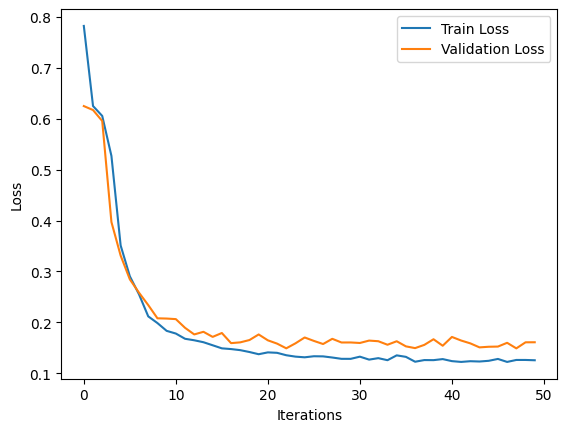

Test Accuracy: 95.00%
Sample 0:
  Features: [ 0.23460178  0.36875884 -0.66104846 -0.64409844 -0.79400121 -0.51824907
  0.11646977 -0.72303939 -1.1813074 ]
  True Label: 0
  Predicted Label: 0

Sample 1:
  Features: [-1.26743862  0.46932479 -0.50321423 -0.69150571 -0.13393883 -0.74244565
 -1.02049155  1.16992062  0.31553988]
  True Label: 1
  Predicted Label: 1

Sample 2:
  Features: [ 1.23596204  1.10414735  0.73922446  1.219372    2.1259358   1.05112697
  1.82191174 -1.30762998  0.90126273]
  True Label: 3
  Predicted Label: 3

Sample 3:
  Features: [ 0.23460178  1.17957181 -0.53963751 -0.42164893 -0.38006378  0.42337655
 -0.1769396  -0.05493586  0.28299972]
  True Label: 3
  Predicted Label: 3

Sample 4:
  Features: [ 0.48494184  1.79553826  0.03099394  0.23840615  0.97362349  0.90166258
  0.42821722 -0.91790292  0.51728886]
  True Label: 1
  Predicted Label: 1



In [ ]:
#q2
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load dataset
dataset = pd.read_csv("/content/updated_pollution_dataset.csv")

# Split dataset into train, validation, and test sets
train_test, val = train_test_split(dataset, test_size=0.2, random_state=1)
train, test = train_test_split(train_test, test_size=0.2, random_state=1)

# Scale features
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train.iloc[:, :-1])
test_scaled = scaler.transform(test.iloc[:, :-1])
val_scaled = scaler.transform(val.iloc[:, :-1])

# One-hot encode labels
encoder = OneHotEncoder()
train_labels = encoder.fit_transform(train.iloc[:, -1].values.reshape(-1, 1))
val_labels = encoder.transform(val.iloc[:, -1].values.reshape(-1, 1))
test_labels = encoder.transform(test.iloc[:, -1].values.reshape(-1, 1))

# Transpose data for neural network
train_X = train_scaled.T
train_Y = train_labels.toarray().T
val_X = val_scaled.T
val_Y = val_labels.toarray().T
test_X = test_scaled.T
test_Y = test_labels.toarray().T

# Print shapes
print("Train X shape:", train_X.shape)
print("Train Y shape:", train_Y.shape)
print("Validation X shape:", val_X.shape)
print("Validation Y shape:", val_Y.shape)
print("Test X shape:", test_X.shape)
print("Test Y shape:", test_Y.shape)

# Initialize parameters for multiple hidden layers
def initialize_parameters(nx, nh, ny):
    tf.random.set_seed(1)
    W = []
    b = []

    for i in range(len(nh)):
        if i == 0:
            W.append(tf.Variable(tf.random.uniform(shape=(nh[i], nx), minval=-0.01, maxval=0.01)))
        else:
            W.append(tf.Variable(tf.random.uniform(shape=(nh[i], nh[i - 1]), minval=-0.01, maxval=0.01)))
        b.append(tf.Variable(tf.zeros(shape=(nh[i], 1))))

    W2 = tf.Variable(tf.random.uniform(shape=(ny, nh[-1]), minval=-0.01, maxval=0.01))
    b2 = tf.Variable(tf.zeros(shape=(ny, 1)))

    parameters = {"W": W,
                  "b": b,
                  "W2": W2,
                  "b2": b2}
    return parameters

# Log-softmax for numerical stability
def log_softmax(x):
    x_max = tf.reduce_max(x, axis=0, keepdims=True)
    return x - x_max - tf.math.log(tf.reduce_sum(tf.exp(x - x_max), axis=0, keepdims=True))

# Forward pass with multiple hidden layers
def forward_pass(parameters, X):
    X = tf.cast(X, tf.float32)
    Z = []
    A = [X]

    for i in range(len(parameters["W"])):
        Z.append(tf.matmul(parameters["W"][i], A[-1]) + parameters["b"][i])
        A.append(tf.nn.relu(Z[-1]))

    Yhat = tf.matmul(parameters["W2"], A[-1]) + parameters["b2"]
    return tf.nn.softmax(Yhat, axis=0)

# Compute loss using log-softmax
def compute_loss(Y, Yhat):
    Yhat = tf.clip_by_value(Yhat, 1e-10, 1.0) #debugged using ai
    individual_losses = -tf.reduce_sum(Y * tf.math.log(Yhat), axis=0)
    total_loss = tf.reduce_mean(individual_losses)
    return total_loss

# Backward pass
def backward_pass(parameters, loss, tape):
    gradients = tape.gradient(loss, parameters)
    return gradients

# Update parameters using Adam
def update_parameters_amo(parameters, gradients, learning_rate, m, v, beta1=0.9, beta2=0.999, epsilon=1e-8):

    for i in range(len(parameters["W"])):
        m["W"][i] = beta1 * m["W"][i] + (1 - beta1) * gradients["W"][i]
        m["b"][i] = beta1 * m["b"][i] + (1 - beta1) * gradients["b"][i]
        v["W"][i] = beta2 * v["W"][i] + (1 - beta2) * (gradients["W"][i] ** 2)
        v["b"][i] = beta2 * v["b"][i] + (1 - beta2) * (gradients["b"][i] ** 2)

    m["W2"] = beta1 * m["W2"] + (1 - beta1) * gradients["W2"]
    m["b2"] = beta1 * m["b2"] + (1 - beta1) * gradients["b2"]
    v["W2"] = beta2 * v["W2"] + (1 - beta2) * (gradients["W2"] ** 2)
    v["b2"] = beta2 * v["b2"] + (1 - beta2) * (gradients["b2"] ** 2)

    # Update parameters
    for i in range(len(parameters["W"])):
        parameters["W"][i].assign_sub(learning_rate * m["W"][i] / (tf.sqrt(v["W"][i]) + epsilon))
        parameters["b"][i].assign_sub(learning_rate * m["b"][i] / (tf.sqrt(v["b"][i]) + epsilon))

    parameters["W2"].assign_sub(learning_rate * m["W2"] / (tf.sqrt(v["W2"]) + epsilon))
    parameters["b2"].assign_sub(learning_rate * m["b2"] / (tf.sqrt(v["b2"]) + epsilon))

    return parameters, m, v

# Create and train the model
def create_nn_model(train_X, train_Y, nh, val_X, val_Y, num_iterations, learning_rate, batch_size):
    # Safety checks
    assert train_X.shape[0] == val_X.shape[0], "train_X and val_X must have the same number of features"
    assert train_X.shape[1] == train_Y.shape[1], "train_X and train_Y must have the same number of examples"
    assert val_X.shape[1] == val_Y.shape[1], "val_X and val_Y must have the same number of examples"

    # Get the number of features and classes
    nx = train_X.shape[0]
    ny = train_Y.shape[0]  # Number of classes

    # Initialize parameters
    parameters = initialize_parameters(nx, nh, ny)

    # Initialize moments
    m = {"W": [tf.zeros_like(w) for w in parameters["W"]],
         "b": [tf.zeros_like(b) for b in parameters["b"]],
         "W2": tf.zeros_like(parameters["W2"]),
         "b2": tf.zeros_like(parameters["b2"])}
    v = {"W": [tf.zeros_like(w) for w in parameters["W"]],
         "b": [tf.zeros_like(b) for b in parameters["b"]],
         "W2": tf.zeros_like(parameters["W2"]),
         "b2": tf.zeros_like(parameters["b2"])}

    val_losses = []
    train_losses = []

    # Training loop
    for i in range(num_iterations):
        permuted_indices = np.random.permutation(train_X.shape[1])
        train_X_shuffled = train_X[:, permuted_indices]
        train_Y_shuffled = train_Y[:, permuted_indices]

        epoch_loss = 0
        num_batches = train_X_shuffled.shape[1] // batch_size

        for j in range(num_batches):
            start_idx = j * batch_size
            end_idx = (j + 1) * batch_size
            batch_X = train_X_shuffled[:, start_idx:end_idx]
            batch_Y = train_Y_shuffled[:, start_idx:end_idx]

            with tf.GradientTape() as tape:
                # Forward pass on batch
                batch_Yhat = forward_pass(parameters, batch_X)
                batch_loss = compute_loss(batch_Y, batch_Yhat)
                epoch_loss += batch_loss

            # Backward pass and update parameters
            gradients = backward_pass(parameters, batch_loss, tape)
            parameters, m, v = update_parameters_amo(parameters, gradients, learning_rate, m, v)

            print(f"Iteration {i}, Batch {j + 1}/{num_batches}: Batch Loss = {batch_loss:.4f}")

        epoch_loss /= num_batches
        train_loss = epoch_loss.numpy()

        # Forward pass on validation data
        val_Yhat = forward_pass(parameters, val_X)
        val_loss = compute_loss(val_Y, val_Yhat)

        # Print losses
        print(f"Iteration {i}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")

        # Append losses
        train_losses.append(train_loss)
        val_losses.append(val_loss)

    # Return parameters and history
    history = {"val_loss": val_losses, "train_loss": train_losses}
    return parameters, history

# Evaluate model
def evaluate_model(parameters, X, Y):
    Yhat = forward_pass(parameters, X)
    predictions = tf.argmax(Yhat, axis=0)
    actual = tf.argmax(Y, axis=0)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions, actual), tf.float32))
    return accuracy.numpy()

# Train the model
nx = train_X.shape[0]
nh = [10, 8, 5, 4, 2]
ny = train_Y.shape[0]

parameters, history = create_nn_model(train_X, train_Y, nh, val_X, val_Y, num_iterations=50, learning_rate=0.01, batch_size=32)

# Test accuracy
test_accuracy = evaluate_model(parameters, test_X, test_Y)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot losses
plt.plot(history["train_loss"], label="Train Loss")
plt.plot(history["val_loss"], label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Predict and print sample results
def predict(parameters, X):
    Yhat = forward_pass(parameters, X)
    predicted_labels = tf.argmax(Yhat, axis=0)
    return predicted_labels

predicted_labels = predict(parameters, test_X)
true_labels = tf.argmax(test_Y, axis=0)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted_labels, true_labels), tf.float32))
print(f"Test Accuracy: {accuracy.numpy() * 100:.2f}%")

num_examples = 5
for i in range(num_examples):
    print(f"Sample {i}:")
    print(f"  Features: {val_X[:, i]}")
    print(f"  True Label: {true_labels[i].numpy()}")
    print(f"  Predicted Label: {predicted_labels[i].numpy()}")
    print()

#3
3- Add Weight decay with Adam (5pt)

Train X shape: (9, 3200)
Train Y shape: (4, 3200)
Validation X shape: (9, 1000)
Validation Y shape: (4, 1000)
Test X shape: (9, 800)
Test Y shape: (4, 800)
Iteration 0: Train Loss = 0.7903, Val Loss = 0.6157
Iteration 1: Train Loss = 0.5536, Val Loss = 0.4381
Iteration 2: Train Loss = 0.3761, Val Loss = 0.3280
Iteration 3: Train Loss = 0.2912, Val Loss = 0.2848
Iteration 4: Train Loss = 0.2523, Val Loss = 0.2550
Iteration 5: Train Loss = 0.2276, Val Loss = 0.2353
Iteration 6: Train Loss = 0.2083, Val Loss = 0.2056
Iteration 7: Train Loss = 0.1858, Val Loss = 0.2251
Iteration 8: Train Loss = 0.1850, Val Loss = 0.1984
Iteration 9: Train Loss = 0.1725, Val Loss = 0.2003
Iteration 10: Train Loss = 0.1695, Val Loss = 0.2053
Iteration 11: Train Loss = 0.1634, Val Loss = 0.2175
Iteration 12: Train Loss = 0.1640, Val Loss = 0.1804
Iteration 13: Train Loss = 0.1576, Val Loss = 0.1825
Iteration 14: Train Loss = 0.1561, Val Loss = 0.1742
Iteration 15: Train Loss = 0.1612, Val Loss = 0.1708
Iterat

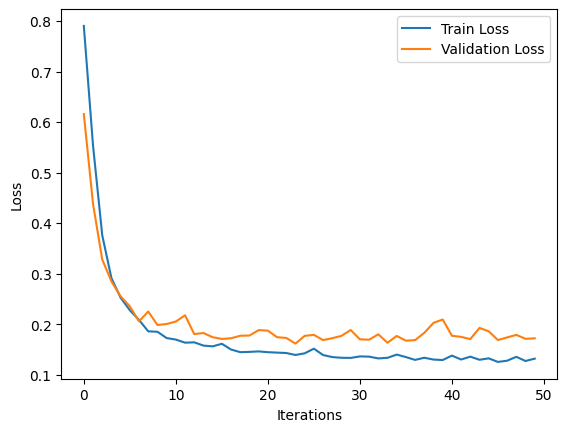

Test Accuracy: 93.75%
Sample 0:
  Features: [ 0.23460178  0.36875884 -0.66104846 -0.64409844 -0.79400121 -0.51824907
  0.11646977 -0.72303939 -1.1813074 ]
  True Label: 0
  Predicted Label: 0

Sample 1:
  Features: [-1.26743862  0.46932479 -0.50321423 -0.69150571 -0.13393883 -0.74244565
 -1.02049155  1.16992062  0.31553988]
  True Label: 1
  Predicted Label: 1

Sample 2:
  Features: [ 1.23596204  1.10414735  0.73922446  1.219372    2.1259358   1.05112697
  1.82191174 -1.30762998  0.90126273]
  True Label: 3
  Predicted Label: 3

Sample 3:
  Features: [ 0.23460178  1.17957181 -0.53963751 -0.42164893 -0.38006378  0.42337655
 -0.1769396  -0.05493586  0.28299972]
  True Label: 3
  Predicted Label: 3

Sample 4:
  Features: [ 0.48494184  1.79553826  0.03099394  0.23840615  0.97362349  0.90166258
  0.42821722 -0.91790292  0.51728886]
  True Label: 1
  Predicted Label: 1



In [ ]:
#q3
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load dataset
dataset = pd.read_csv("/content/updated_pollution_dataset.csv")

# Split dataset into train, validation, and test sets
train_test, val = train_test_split(dataset, test_size=0.2, random_state=1)
train, test = train_test_split(train_test, test_size=0.2, random_state=1)

# Scale features
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train.iloc[:, :-1])
test_scaled = scaler.transform(test.iloc[:, :-1])
val_scaled = scaler.transform(val.iloc[:, :-1])

# One-hot encode labels
encoder = OneHotEncoder()
train_labels = encoder.fit_transform(train.iloc[:, -1].values.reshape(-1, 1))
val_labels = encoder.transform(val.iloc[:, -1].values.reshape(-1, 1))
test_labels = encoder.transform(test.iloc[:, -1].values.reshape(-1, 1))

# Transpose data for neural network
train_X = train_scaled.T
train_Y = train_labels.toarray().T
val_X = val_scaled.T
val_Y = val_labels.toarray().T
test_X = test_scaled.T
test_Y = test_labels.toarray().T

# Print shapes
print("Train X shape:", train_X.shape)
print("Train Y shape:", train_Y.shape)
print("Validation X shape:", val_X.shape)
print("Validation Y shape:", val_Y.shape)
print("Test X shape:", test_X.shape)
print("Test Y shape:", test_Y.shape)

# Initialize parameters for multiple hidden layers
def initialize_parameters(nx, nh, ny):
    tf.random.set_seed(1)
    W = []
    b = []

    for i in range(len(nh)):
        if i == 0:
            W.append(tf.Variable(tf.random.uniform(shape=(nh[i], nx), minval=-0.01, maxval=0.01)))
        else:
            W.append(tf.Variable(tf.random.uniform(shape=(nh[i], nh[i - 1]), minval=-0.01, maxval=0.01)))
        b.append(tf.Variable(tf.zeros(shape=(nh[i], 1))))

    W2 = tf.Variable(tf.random.uniform(shape=(ny, nh[-1]), minval=-0.01, maxval=0.01))
    b2 = tf.Variable(tf.zeros(shape=(ny, 1)))

    parameters = {"W": W,
                  "b": b,
                  "W2": W2,
                  "b2": b2}
    return parameters

# Log-softmax for numerical stability
def log_softmax(x):
    x_max = tf.reduce_max(x, axis=0, keepdims=True)
    return x - x_max - tf.math.log(tf.reduce_sum(tf.exp(x - x_max), axis=0, keepdims=True))

# Forward pass with multiple hidden layers
def forward_pass(parameters, X):
    X = tf.cast(X, tf.float32)
    Z = []
    A = [X]

    for i in range(len(parameters["W"])):
        Z.append(tf.matmul(parameters["W"][i], A[-1]) + parameters["b"][i])
        A.append(tf.nn.relu(Z[-1]))

    Yhat = tf.matmul(parameters["W2"], A[-1]) + parameters["b2"]
    return tf.nn.softmax(Yhat, axis=0)

# Compute loss using log-softmax
def compute_loss(Y, Yhat):
    Yhat = tf.clip_by_value(Yhat, 1e-10, 1.0)  #debugged using ai
    individual_losses = -tf.reduce_sum(Y * tf.math.log(Yhat), axis=0)
    total_loss = tf.reduce_mean(individual_losses)
    return total_loss

# Backward pass
def backward_pass(parameters, loss, tape):
    gradients = tape.gradient(loss, parameters)
    return gradients

# Update parameters using AdamW
def update_parameters_adamw(parameters, gradients, learning_rate, m, v, weight_decay=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):

    for i in range(len(parameters["W"])):
        m["W"][i] = beta1 * m["W"][i] + (1 - beta1) * gradients["W"][i]
        m["b"][i] = beta1 * m["b"][i] + (1 - beta1) * gradients["b"][i]
        v["W"][i] = beta2 * v["W"][i] + (1 - beta2) * (gradients["W"][i] ** 2)
        v["b"][i] = beta2 * v["b"][i] + (1 - beta2) * (gradients["b"][i] ** 2)

    m["W2"] = beta1 * m["W2"] + (1 - beta1) * gradients["W2"]
    m["b2"] = beta1 * m["b2"] + (1 - beta1) * gradients["b2"]
    v["W2"] = beta2 * v["W2"] + (1 - beta2) * (gradients["W2"] ** 2)
    v["b2"] = beta2 * v["b2"] + (1 - beta2) * (gradients["b2"] ** 2)

    # Update parameters with weight decay
    for i in range(len(parameters["W"])):
        parameters["W"][i].assign_sub(learning_rate * (m["W"][i] / (tf.sqrt(v["W"][i]) + epsilon) + weight_decay * parameters["W"][i]))
        parameters["b"][i].assign_sub(learning_rate * (m["b"][i] / (tf.sqrt(v["b"][i]) + epsilon) + weight_decay * parameters["b"][i]))

    parameters["W2"].assign_sub(learning_rate * (m["W2"] / (tf.sqrt(v["W2"]) + epsilon) + weight_decay * parameters["W2"]))
    parameters["b2"].assign_sub(learning_rate * (m["b2"] / (tf.sqrt(v["b2"]) + epsilon) + weight_decay * parameters["b2"]))

    return parameters, m, v

# Create and train the model
def create_nn_model(train_X, train_Y, nh, val_X, val_Y, num_iterations, learning_rate, batch_size):
    # Safety checks
    assert train_X.shape[0] == val_X.shape[0], "train_X and val_X must have the same number of features"
    assert train_X.shape[1] == train_Y.shape[1], "train_X and train_Y must have the same number of examples"
    assert val_X.shape[1] == val_Y.shape[1], "val_X and val_Y must have the same number of examples"

    # Get the number of features and classes
    nx = train_X.shape[0]
    ny = train_Y.shape[0]  # Number of classes

    # Initialize parameters
    parameters = initialize_parameters(nx, nh, ny)

    # Initialize moments for AdamW
    m = {"W": [tf.zeros_like(w) for w in parameters["W"]],
         "b": [tf.zeros_like(b) for b in parameters["b"]],
         "W2": tf.zeros_like(parameters["W2"]),
         "b2": tf.zeros_like(parameters["b2"])}
    v = {"W": [tf.zeros_like(w) for w in parameters["W"]],
         "b": [tf.zeros_like(b) for b in parameters["b"]],
         "W2": tf.zeros_like(parameters["W2"]),
         "b2": tf.zeros_like(parameters["b2"])}

    val_losses = []
    train_losses = []

    # Training loop
    for i in range(num_iterations):
        permuted_indices = np.random.permutation(train_X.shape[1])
        train_X_shuffled = train_X[:, permuted_indices]
        train_Y_shuffled = train_Y[:, permuted_indices]

        epoch_loss = 0
        num_batches = train_X_shuffled.shape[1] // batch_size

        for j in range(num_batches):
            start_idx = j * batch_size
            end_idx = (j + 1) * batch_size
            batch_X = train_X_shuffled[:, start_idx:end_idx]
            batch_Y = train_Y_shuffled[:, start_idx:end_idx]

            with tf.GradientTape() as tape:
                # Forward pass on batch
                batch_Yhat = forward_pass(parameters, batch_X)
                batch_loss = compute_loss(batch_Y, batch_Yhat)
                epoch_loss += batch_loss

            # Backward pass and update parameters
            gradients = backward_pass(parameters, batch_loss, tape)
            parameters, m, v = update_parameters_adamw(parameters, gradients, learning_rate, m, v)

            #print(f"Iteration {i}, Batch {j + 1}/{num_batches}: Batch Loss = {batch_loss:.4f}")

        epoch_loss /= num_batches
        train_loss = epoch_loss.numpy()

        # Forward pass on validation data
        val_Yhat = forward_pass(parameters, val_X)
        val_loss = compute_loss(val_Y, val_Yhat)

        # Print losses
        print(f"Iteration {i}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")

        # Append losses
        train_losses.append(train_loss)
        val_losses.append(val_loss)

    # Return parameters and history
    history = {"val_loss": val_losses, "train_loss": train_losses}
    return parameters, history

# Evaluate model
def evaluate_model(parameters, X, Y):
    Yhat = forward_pass(parameters, X)
    predictions = tf.argmax(Yhat, axis=0)
    actual = tf.argmax(Y, axis=0)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions, actual), tf.float32))
    return accuracy.numpy()

# Train the model
nx = train_X.shape[0]
nh = [10, 8, 5, 4, 2]
ny = train_Y.shape[0]

parameters, history = create_nn_model(train_X, train_Y, nh, val_X, val_Y, num_iterations=50, learning_rate=0.01, batch_size=32)

# Test accuracy
test_accuracy = evaluate_model(parameters, test_X, test_Y)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot losses
plt.plot(history["train_loss"], label="Train Loss")
plt.plot(history["val_loss"], label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Predict and print sample results
def predict(parameters, X):
    Yhat = forward_pass(parameters, X)
    predicted_labels = tf.argmax(Yhat, axis=0)
    return predicted_labels

predicted_labels = predict(parameters, test_X)
true_labels = tf.argmax(test_Y, axis=0)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted_labels, true_labels), tf.float32))
print(f"Test Accuracy: {accuracy.numpy() * 100:.2f}%")

num_examples = 5
for i in range(num_examples):
    print(f"Sample {i}:")
    print(f"  Features: {val_X[:, i]}")
    print(f"  True Label: {true_labels[i].numpy()}")
    print(f"  Predicted Label: {predicted_labels[i].numpy()}")
    print()

#4
4- Reduce Learning Rate on Plateau(2pt)

Train X shape: (9, 3200)
Train Y shape: (4, 3200)
Validation X shape: (9, 1000)
Validation Y shape: (4, 1000)
Test X shape: (9, 800)
Test Y shape: (4, 800)
Iteration 0: Train Loss = 1.2912, Val Loss = 1.2841,  Learning Rate = 0.0100
Iteration 1: Train Loss = 1.2840, Val Loss = 1.2800,  Learning Rate = 0.0100
Iteration 2: Train Loss = 1.2829, Val Loss = 1.2809,  Learning Rate = 0.0100
Iteration 3: Train Loss = 1.2824, Val Loss = 1.2805,  Learning Rate = 0.0100
Iteration 4: Train Loss = 1.2829, Val Loss = 1.2791,  Learning Rate = 0.0100
Iteration 5: Train Loss = 1.2830, Val Loss = 1.2790,  Learning Rate = 0.0100
Iteration 6: Train Loss = 1.2826, Val Loss = 1.2789,  Learning Rate = 0.0100
Iteration 7: Train Loss = 1.2825, Val Loss = 1.2798,  Learning Rate = 0.0100
Iteration 8: Train Loss = 1.2827, Val Loss = 1.2792,  Learning Rate = 0.0100
Iteration 9: Train Loss = 1.2821, Val Loss = 1.2791,  Learning Rate = 0.0100
Iteration 10: Train Loss = 1.2819, Val Loss = 1.2789,  Learning Rate = 0.0

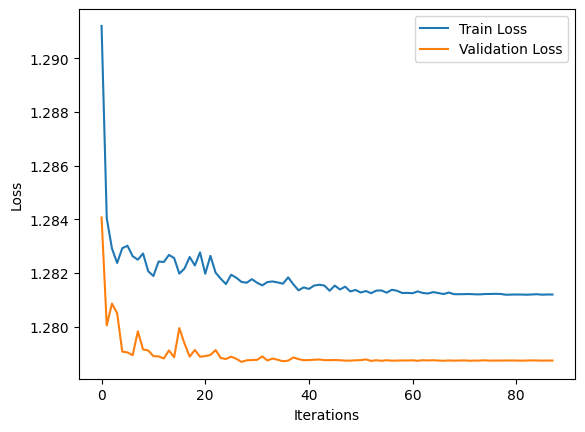

Test Accuracy: 39.00%
Sample 0:
  Features: [ 0.23460178  0.36875884 -0.66104846 -0.64409844 -0.79400121 -0.51824907
  0.11646977 -0.72303939 -1.1813074 ]
  True Label: 0
  Predicted Label: 0

Sample 1:
  Features: [-1.26743862  0.46932479 -0.50321423 -0.69150571 -0.13393883 -0.74244565
 -1.02049155  1.16992062  0.31553988]
  True Label: 1
  Predicted Label: 0

Sample 2:
  Features: [ 1.23596204  1.10414735  0.73922446  1.219372    2.1259358   1.05112697
  1.82191174 -1.30762998  0.90126273]
  True Label: 3
  Predicted Label: 0

Sample 3:
  Features: [ 0.23460178  1.17957181 -0.53963751 -0.42164893 -0.38006378  0.42337655
 -0.1769396  -0.05493586  0.28299972]
  True Label: 3
  Predicted Label: 0

Sample 4:
  Features: [ 0.48494184  1.79553826  0.03099394  0.23840615  0.97362349  0.90166258
  0.42821722 -0.91790292  0.51728886]
  True Label: 1
  Predicted Label: 0



In [ ]:
#q4
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load dataset
dataset = pd.read_csv("/content/updated_pollution_dataset.csv")

# Split dataset into train, validation, and test sets
train_test, val = train_test_split(dataset, test_size=0.2, random_state=1)
train, test = train_test_split(train_test, test_size=0.2, random_state=1)

# Scale features
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train.iloc[:, :-1])
test_scaled = scaler.transform(test.iloc[:, :-1])
val_scaled = scaler.transform(val.iloc[:, :-1])

# One-hot encode labels
encoder = OneHotEncoder()
train_labels = encoder.fit_transform(train.iloc[:, -1].values.reshape(-1, 1))
val_labels = encoder.transform(val.iloc[:, -1].values.reshape(-1, 1))
test_labels = encoder.transform(test.iloc[:, -1].values.reshape(-1, 1))

# Transpose data for neural network
train_X = train_scaled.T
train_Y = train_labels.toarray().T
val_X = val_scaled.T
val_Y = val_labels.toarray().T
test_X = test_scaled.T
test_Y = test_labels.toarray().T

# Print shapes
print("Train X shape:", train_X.shape)
print("Train Y shape:", train_Y.shape)
print("Validation X shape:", val_X.shape)
print("Validation Y shape:", val_Y.shape)
print("Test X shape:", test_X.shape)
print("Test Y shape:", test_Y.shape)

# Initialize parameters for multiple hidden layers
def initialize_parameters(nx, nh, ny):
    tf.random.set_seed(1)
    W = []
    b = []

    for i in range(len(nh)):
        if i == 0:
            W.append(tf.Variable(tf.random.uniform(shape=(nh[i], nx), minval=-0.01, maxval=0.01)))
        else:
            W.append(tf.Variable(tf.random.uniform(shape=(nh[i], nh[i - 1]), minval=-0.01, maxval=0.01)))
        b.append(tf.Variable(tf.zeros(shape=(nh[i], 1))))

    W2 = tf.Variable(tf.random.uniform(shape=(ny, nh[-1]), minval=-0.01, maxval=0.01))
    b2 = tf.Variable(tf.zeros(shape=(ny, 1)))

    parameters = {"W": W,
                  "b": b,
                  "W2": W2,
                  "b2": b2}
    return parameters

# Log-softmax for numerical stability
def log_softmax(x):
    x_max = tf.reduce_max(x, axis=0, keepdims=True)
    return x - x_max - tf.math.log(tf.reduce_sum(tf.exp(x - x_max), axis=0, keepdims=True))

# Forward pass with multiple hidden layers
def forward_pass(parameters, X):
    X = tf.cast(X, tf.float32)
    Z = []
    A = [X]

    for i in range(len(parameters["W"])):
        Z.append(tf.matmul(parameters["W"][i], A[-1]) + parameters["b"][i])
        A.append(tf.nn.relu(Z[-1]))

    Yhat = tf.matmul(parameters["W2"], A[-1]) + parameters["b2"]
    return tf.nn.softmax(Yhat, axis=0)

# Compute loss using log-softmax
def compute_loss(Y, Yhat):
    Yhat = tf.clip_by_value(Yhat, 1e-10, 1.0)  #debugged using ai
    individual_losses = -tf.reduce_sum(Y * tf.math.log(Yhat), axis=0)
    total_loss = tf.reduce_mean(individual_losses)
    return total_loss

# Backward pass
def backward_pass(parameters, loss, tape):
    gradients = tape.gradient(loss, parameters)
    return gradients

# Update parameters using AdamW
def update_parameters_adamw(parameters, gradients, learning_rate, m, v, weight_decay=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
    for i in range(len(parameters["W"])):
        m["W"][i] = beta1 * m["W"][i] + (1 - beta1) * gradients["W"][i]
        m["b"][i] = beta1 * m["b"][i] + (1 - beta1) * gradients["b"][i]
        v["W"][i] = beta2 * v["W"][i] + (1 - beta2) * (gradients["W"][i] ** 2)
        v["b"][i] = beta2 * v["b"][i] + (1 - beta2) * (gradients["b"][i] ** 2)

    m["W2"] = beta1 * m["W2"] + (1 - beta1) * gradients["W2"]
    m["b2"] = beta1 * m["b2"] + (1 - beta1) * gradients["b2"]
    v["W2"] = beta2 * v["W2"] + (1 - beta2) * (gradients["W2"] ** 2)
    v["b2"] = beta2 * v["b2"] + (1 - beta2) * (gradients["b2"] ** 2)

    # Update parameters with weight decay
    for i in range(len(parameters["W"])):
        parameters["W"][i].assign_sub(learning_rate * (m["W"][i] / (tf.sqrt(v["W"][i]) + epsilon) + weight_decay * parameters["W"][i]))
        parameters["b"][i].assign_sub(learning_rate * (m["b"][i] / (tf.sqrt(v["b"][i]) + epsilon) + weight_decay * parameters["b"][i]))

    parameters["W2"].assign_sub(learning_rate * (m["W2"] / (tf.sqrt(v["W2"]) + epsilon) + weight_decay * parameters["W2"]))
    parameters["b2"].assign_sub(learning_rate * (m["b2"] / (tf.sqrt(v["b2"]) + epsilon) + weight_decay * parameters["b2"]))

    return parameters, m, v

# Create and train the model
def create_nn_model(train_X, train_Y, nh, val_X, val_Y, num_iterations, learning_rate, batch_size):
    # Safety checks
    assert train_X.shape[0] == val_X.shape[0], "train_X and val_X must have the same number of features"
    assert train_X.shape[1] == train_Y.shape[1], "train_X and train_Y must have the same number of examples"
    assert val_X.shape[1] == val_Y.shape[1], "val_X and val_Y must have the same number of examples"

    # Get the number of features and classes
    nx = train_X.shape[0]
    ny = train_Y.shape[0]  # Number of classes

    # Initialize parameters
    parameters = initialize_parameters(nx, nh, ny)

    # Initialize moments for AdamW
    m = {"W": [tf.zeros_like(w) for w in parameters["W"]],
         "b": [tf.zeros_like(b) for b in parameters["b"]],
         "W2": tf.zeros_like(parameters["W2"]),
         "b2": tf.zeros_like(parameters["b2"])}
    v = {"W": [tf.zeros_like(w) for w in parameters["W"]],
         "b": [tf.zeros_like(b) for b in parameters["b"]],
         "W2": tf.zeros_like(parameters["W2"]),
         "b2": tf.zeros_like(parameters["b2"])}

    val_losses = []
    train_losses = []
    #checking number of epochs since last improvement for reducing learning rate
    last_improvement = 0
    patience = 10
    best_val_loss = float('inf')

    # Training loop
    for i in range(num_iterations):
        permuted_indices = np.random.permutation(train_X.shape[1])
        train_X_shuffled = train_X[:, permuted_indices]
        train_Y_shuffled = train_Y[:, permuted_indices]

        epoch_loss = 0
        num_batches = train_X_shuffled.shape[1] // batch_size

        for j in range(num_batches):
            start_idx = j * batch_size
            end_idx = (j + 1) * batch_size
            batch_X = train_X_shuffled[:, start_idx:end_idx]
            batch_Y = train_Y_shuffled[:, start_idx:end_idx]

            with tf.GradientTape() as tape:
                # Forward pass on batch
                batch_Yhat = forward_pass(parameters, batch_X)
                batch_loss = compute_loss(batch_Y, batch_Yhat)
                epoch_loss += batch_loss

            # Backward pass and update parameters
            gradients = backward_pass(parameters, batch_loss, tape)
            parameters, m, v = update_parameters_adamw(parameters, gradients, learning_rate, m, v)

            #print(f"Iteration {i}, Batch {j + 1}/{num_batches}: Batch Loss = {batch_loss:.4f}")

        epoch_loss /= num_batches
        train_loss = epoch_loss.numpy()

        # Forward pass on validation data
        val_Yhat = forward_pass(parameters, val_X)
        val_loss = compute_loss(val_Y, val_Yhat)

        # Print losses
        print(f"Iteration {i}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f},  Learning Rate = {learning_rate:.4f}")

        # Append losses
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        # Check for improvement
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_parameters = parameters
            last_improvement = 0
        else:
            last_improvement += 1
        if last_improvement >= patience:
            # Reduce learning rate
            learning_rate /= 2
            print(f"Reducing learning rate to {learning_rate}")
            last_improvement = 0

            if learning_rate < 1e-4:
                print("Learning rate has reached a minimum. Stopping training.")
                break


    # Return parameters and history
    history = {"val_loss": val_losses, "train_loss": train_losses}
    return best_parameters, history

# Evaluate model
def evaluate_model(parameters, X, Y):
    Yhat = forward_pass(parameters, X)
    predictions = tf.argmax(Yhat, axis=0)
    actual = tf.argmax(Y, axis=0)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions, actual), tf.float32))
    return accuracy.numpy()

# Train the model
nx = train_X.shape[0]
nh = [10, 8, 5, 4, 2]
ny = train_Y.shape[0]

parameters, history = create_nn_model(train_X, train_Y, nh, val_X, val_Y, num_iterations=150, learning_rate=0.01, batch_size=32)

# Test accuracy
test_accuracy = evaluate_model(parameters, test_X, test_Y)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot losses
plt.plot(history["train_loss"], label="Train Loss")
plt.plot(history["val_loss"], label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Predict and print sample results
def predict(parameters, X):
    Yhat = forward_pass(parameters, X)
    predicted_labels = tf.argmax(Yhat, axis=0)
    return predicted_labels

predicted_labels = predict(parameters, test_X)
true_labels = tf.argmax(test_Y, axis=0)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted_labels, true_labels), tf.float32))
print(f"Test Accuracy: {accuracy.numpy() * 100:.2f}%")

num_examples = 5
for i in range(num_examples):
    print(f"Sample {i}:")
    print(f"  Features: {val_X[:, i]}")
    print(f"  True Label: {true_labels[i].numpy()}")
    print(f"  Predicted Label: {predicted_labels[i].numpy()}")
    print()

#5
5- Add Dropout Regularization (3pt)

In [ ]:
#q5
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow_probability as tfp

# Load dataset
dataset = pd.read_csv("/content/updated_pollution_dataset.csv")

# Split dataset into train, validation, and test sets
train_test, val = train_test_split(dataset, test_size=0.2, random_state=1)
train, test = train_test_split(train_test, test_size=0.2, random_state=1)

# Scale features
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train.iloc[:, :-1])
test_scaled = scaler.transform(test.iloc[:, :-1])
val_scaled = scaler.transform(val.iloc[:, :-1])

# One-hot encode labels
encoder = OneHotEncoder()
train_labels = encoder.fit_transform(train.iloc[:, -1].values.reshape(-1, 1))
val_labels = encoder.transform(val.iloc[:, -1].values.reshape(-1, 1))
test_labels = encoder.transform(test.iloc[:, -1].values.reshape(-1, 1))

# Transpose data for neural network
train_X = train_scaled.T
train_Y = train_labels.toarray().T
val_X = val_scaled.T
val_Y = val_labels.toarray().T
test_X = test_scaled.T
test_Y = test_labels.toarray().T

# Print shapes
print("Train X shape:", train_X.shape)
print("Train Y shape:", train_Y.shape)
print("Validation X shape:", val_X.shape)
print("Validation Y shape:", val_Y.shape)
print("Test X shape:", test_X.shape)
print("Test Y shape:", test_Y.shape)

# Initialize parameters for multiple hidden layers
def initialize_parameters(nx, nh, ny):
    tf.random.set_seed(1)
    W = []
    b = []

    for i in range(len(nh)):
        if i == 0:
            W.append(tf.Variable(tf.random.uniform(shape=(nh[i], nx), minval=-0.01, maxval=0.01)))
        else:
            W.append(tf.Variable(tf.random.uniform(shape=(nh[i], nh[i - 1]), minval=-0.01, maxval=0.01)))
        b.append(tf.Variable(tf.zeros(shape=(nh[i], 1))))

    W2 = tf.Variable(tf.random.uniform(shape=(ny, nh[-1]), minval=-0.01, maxval=0.01))
    b2 = tf.Variable(tf.zeros(shape=(ny, 1)))

    parameters = {"W": W,
                  "b": b,
                  "W2": W2,
                  "b2": b2}
    return parameters

# Log-softmax for numerical stability
def log_softmax(x):
    x_max = tf.reduce_max(x, axis=0, keepdims=True)
    return x - x_max - tf.math.log(tf.reduce_sum(tf.exp(x - x_max), axis=0, keepdims=True))

# Forward pass with multiple hidden layers
def forward_pass(parameters, X,training,dropout_rate=0.2):
    X = tf.cast(X, tf.float32)
    Z = []
    A = [X]

    for i in range(len(parameters["W"])):
        Z.append(tf.matmul(parameters["W"][i], A[-1]) + parameters["b"][i])
        A.append(tf.nn.relu(Z[-1]))

        #ai
        if training and i<len(parameters["W"])-1:
          keep_prob = 1 - dropout_rate
          mask = tfp.distributions.Bernoulli(probs=keep_prob).sample(tf.shape(A[-1]))
          mask = tf.cast(mask, tf.float32)
          A[-1] = A[-1] * mask / keep_prob

    Yhat = tf.matmul(parameters["W2"], A[-1]) + parameters["b2"]
    return tf.nn.softmax(Yhat, axis=0)

# Compute loss using log-softmax
def compute_loss(Y, Yhat):
    Yhat = tf.clip_by_value(Yhat, 1e-10, 1.0)#debugged using ai
    individual_losses = -tf.reduce_sum(Y * tf.math.log(Yhat), axis=0)
    total_loss = tf.reduce_mean(individual_losses)
    return total_loss

# Backward pass
def backward_pass(parameters, loss, tape):
    gradients = tape.gradient(loss, parameters)
    return gradients

# Update parameters using AdamW
def update_parameters_adamw(parameters, gradients, learning_rate, m, v, weight_decay=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):

    for i in range(len(parameters["W"])):
        m["W"][i] = beta1 * m["W"][i] + (1 - beta1) * gradients["W"][i]
        m["b"][i] = beta1 * m["b"][i] + (1 - beta1) * gradients["b"][i]
        v["W"][i] = beta2 * v["W"][i] + (1 - beta2) * (gradients["W"][i] ** 2)
        v["b"][i] = beta2 * v["b"][i] + (1 - beta2) * (gradients["b"][i] ** 2)

    m["W2"] = beta1 * m["W2"] + (1 - beta1) * gradients["W2"]
    m["b2"] = beta1 * m["b2"] + (1 - beta1) * gradients["b2"]
    v["W2"] = beta2 * v["W2"] + (1 - beta2) * (gradients["W2"] ** 2)
    v["b2"] = beta2 * v["b2"] + (1 - beta2) * (gradients["b2"] ** 2)

    # Update parameters with weight decay
    for i in range(len(parameters["W"])):
        parameters["W"][i].assign_sub(learning_rate * (m["W"][i] / (tf.sqrt(v["W"][i]) + epsilon) + weight_decay * parameters["W"][i]))
        parameters["b"][i].assign_sub(learning_rate * (m["b"][i] / (tf.sqrt(v["b"][i]) + epsilon) + weight_decay * parameters["b"][i]))

    parameters["W2"].assign_sub(learning_rate * (m["W2"] / (tf.sqrt(v["W2"]) + epsilon) + weight_decay * parameters["W2"]))
    parameters["b2"].assign_sub(learning_rate * (m["b2"] / (tf.sqrt(v["b2"]) + epsilon) + weight_decay * parameters["b2"]))

    return parameters, m, v

# Create and train the model
def create_nn_model(train_X, train_Y, nh, val_X, val_Y, num_iterations, learning_rate, batch_size):
    # Safety checks
    assert train_X.shape[0] == val_X.shape[0], "train_X and val_X must have the same number of features"
    assert train_X.shape[1] == train_Y.shape[1], "train_X and train_Y must have the same number of examples"
    assert val_X.shape[1] == val_Y.shape[1], "val_X and val_Y must have the same number of examples"

    # Get the number of features and classes
    nx = train_X.shape[0]
    ny = train_Y.shape[0]  # Number of classes

    # Initialize parameters
    parameters = initialize_parameters(nx, nh, ny)

    # Initialize moments for AdamW
    m = {"W": [tf.zeros_like(w) for w in parameters["W"]],
         "b": [tf.zeros_like(b) for b in parameters["b"]],
         "W2": tf.zeros_like(parameters["W2"]),
         "b2": tf.zeros_like(parameters["b2"])}
    v = {"W": [tf.zeros_like(w) for w in parameters["W"]],
         "b": [tf.zeros_like(b) for b in parameters["b"]],
         "W2": tf.zeros_like(parameters["W2"]),
         "b2": tf.zeros_like(parameters["b2"])}

    val_losses = []
    train_losses = []
    #checking number of epochs since last improvement for reducing learning rate
    last_improvement = 0
    patience = 10
    best_val_loss = float('inf')

    # Training loop
    for i in range(num_iterations):
        permuted_indices = np.random.permutation(train_X.shape[1])
        train_X_shuffled = train_X[:, permuted_indices]
        train_Y_shuffled = train_Y[:, permuted_indices]

        epoch_loss = 0
        num_batches = train_X_shuffled.shape[1] // batch_size

        for j in range(num_batches):
            start_idx = j * batch_size
            end_idx = (j + 1) * batch_size
            batch_X = train_X_shuffled[:, start_idx:end_idx]
            batch_Y = train_Y_shuffled[:, start_idx:end_idx]

            with tf.GradientTape() as tape:
                # Forward pass on batch
                batch_Yhat = forward_pass(parameters, batch_X,training=True,dropout_rate=0.2)
                batch_loss = compute_loss(batch_Y, batch_Yhat)
                epoch_loss += batch_loss

            # Backward pass and update parameters
            gradients = backward_pass(parameters, batch_loss, tape)
            parameters, m, v = update_parameters_adamw(parameters, gradients, learning_rate, m, v)

            #print(f"Iteration {i}, Batch {j + 1}/{num_batches}: Batch Loss = {batch_loss:.4f}")

        epoch_loss /= num_batches
        train_loss = epoch_loss.numpy()

        # Forward pass on validation data
        val_Yhat = forward_pass(parameters, val_X,training=False)
        val_loss = compute_loss(val_Y, val_Yhat)

        # Print losses
        print(f"Iteration {i}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f},  Learning Rate = {learning_rate:.4f}")

        # Append losses
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        # Check for improvement
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_parameters = parameters
            last_improvement = 0
        else:
            last_improvement += 1
        if last_improvement >= patience:
            # Reduce learning rate
            learning_rate /= 2
            print(f"Reducing learning rate to {learning_rate}")
            last_improvement = 0

            if learning_rate < 1e-4:
                print("Learning rate has reached a minimum. Stopping training.")
                break


    # Return parameters and history
    history = {"val_loss": val_losses, "train_loss": train_losses}
    return best_parameters, history

# Evaluate model
def evaluate_model(parameters, X, Y):
    Yhat = forward_pass(parameters, X,training=False)
    predictions = tf.argmax(Yhat, axis=0)
    actual = tf.argmax(Y, axis=0)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions, actual), tf.float32))
    return accuracy.numpy()

# Train the model
nx = train_X.shape[0]
nh = [10, 8, 5, 4, 2]
ny = train_Y.shape[0]

parameters, history = create_nn_model(train_X, train_Y, nh, val_X, val_Y, num_iterations=150, learning_rate=0.01, batch_size=32)

# Test accuracy
test_accuracy = evaluate_model(parameters, test_X, test_Y)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot losses
plt.plot(history["train_loss"], label="Train Loss")
plt.plot(history["val_loss"], label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Predict and print sample results
def predict(parameters, X):
    Yhat = forward_pass(parameters, X,training=False)
    predicted_labels = tf.argmax(Yhat, axis=0)
    return predicted_labels

predicted_labels = predict(parameters, test_X)
true_labels = tf.argmax(test_Y, axis=0)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted_labels, true_labels), tf.float32))
print(f"Test Accuracy: {accuracy.numpy() * 100:.2f}%")

num_examples = 5
for i in range(num_examples):
    print(f"Sample {i}:")
    print(f"  Features: {val_X[:, i]}")
    print(f"  True Label: {true_labels[i].numpy()}")
    print(f"  Predicted Label: {predicted_labels[i].numpy()}")
    print()

Train X shape: (9, 3200)
Train Y shape: (4, 3200)
Validation X shape: (9, 1000)
Validation Y shape: (4, 1000)
Test X shape: (9, 800)
Test Y shape: (4, 800)
Iteration 0: Train Loss = 0.8768, Val Loss = 0.6558,  Learning Rate = 0.0100
Iteration 1: Train Loss = 0.7278, Val Loss = 0.6378,  Learning Rate = 0.0100
Iteration 2: Train Loss = 0.7313, Val Loss = 0.6479,  Learning Rate = 0.0100
Iteration 3: Train Loss = 0.7300, Val Loss = 0.6377,  Learning Rate = 0.0100
Iteration 4: Train Loss = 0.6999, Val Loss = 0.6446,  Learning Rate = 0.0100
Iteration 5: Train Loss = 0.6990, Val Loss = 0.6365,  Learning Rate = 0.0100
Iteration 6: Train Loss = 0.6978, Val Loss = 0.6285,  Learning Rate = 0.0100
Iteration 7: Train Loss = 0.7008, Val Loss = 0.6317,  Learning Rate = 0.0100
Iteration 8: Train Loss = 0.6875, Val Loss = 0.6244,  Learning Rate = 0.0100
Iteration 9: Train Loss = 0.7110, Val Loss = 0.6275,  Learning Rate = 0.0100
Iteration 10: Train Loss = 0.6880, Val Loss = 0.6184,  Learning Rate = 0.0

KeyboardInterrupt: 

#6
6- Add Batch Normalization (5 pt)

Train X shape: (9, 3200)
Train Y shape: (4, 3200)
Validation X shape: (9, 1000)
Validation Y shape: (4, 1000)
Test X shape: (9, 800)
Test Y shape: (4, 800)
Iteration 0: Train Loss = 0.6696, Val Loss = 0.4215,  Learning Rate = 0.0100
Iteration 1: Train Loss = 0.5120, Val Loss = 0.3584,  Learning Rate = 0.0100
Iteration 2: Train Loss = 0.4909, Val Loss = 0.3426,  Learning Rate = 0.0100
Iteration 3: Train Loss = 0.4975, Val Loss = 0.3262,  Learning Rate = 0.0100
Iteration 4: Train Loss = 0.4751, Val Loss = 0.3291,  Learning Rate = 0.0100
Iteration 5: Train Loss = 0.4795, Val Loss = 0.3114,  Learning Rate = 0.0100
Iteration 6: Train Loss = 0.4569, Val Loss = 0.3076,  Learning Rate = 0.0100
Iteration 7: Train Loss = 0.4766, Val Loss = 0.3015,  Learning Rate = 0.0100
Iteration 8: Train Loss = 0.4791, Val Loss = 0.3004,  Learning Rate = 0.0100
Iteration 9: Train Loss = 0.5003, Val Loss = 0.2986,  Learning Rate = 0.0100
Iteration 10: Train Loss = 0.4766, Val Loss = 0.2954,  Learning Rate = 0.0

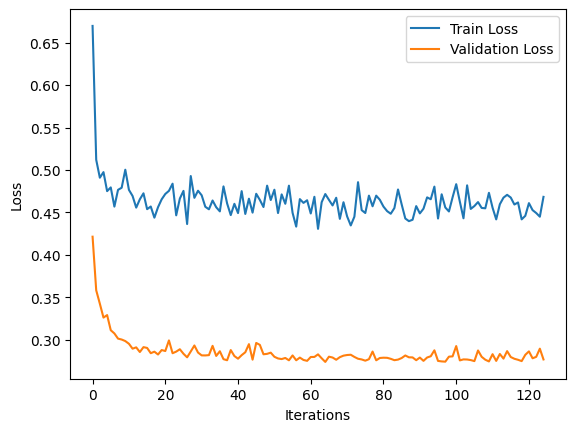

Test Accuracy: 92.37%
Sample 0:
  Features: [ 0.23460178  0.36875884 -0.66104846 -0.64409844 -0.79400121 -0.51824907
  0.11646977 -0.72303939 -1.1813074 ]
  True Label: 0
  Predicted Label: 0

Sample 1:
  Features: [-1.26743862  0.46932479 -0.50321423 -0.69150571 -0.13393883 -0.74244565
 -1.02049155  1.16992062  0.31553988]
  True Label: 1
  Predicted Label: 3

Sample 2:
  Features: [ 1.23596204  1.10414735  0.73922446  1.219372    2.1259358   1.05112697
  1.82191174 -1.30762998  0.90126273]
  True Label: 3
  Predicted Label: 3

Sample 3:
  Features: [ 0.23460178  1.17957181 -0.53963751 -0.42164893 -0.38006378  0.42337655
 -0.1769396  -0.05493586  0.28299972]
  True Label: 3
  Predicted Label: 3

Sample 4:
  Features: [ 0.48494184  1.79553826  0.03099394  0.23840615  0.97362349  0.90166258
  0.42821722 -0.91790292  0.51728886]
  True Label: 1
  Predicted Label: 1



In [ ]:
#q6
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow_probability as tfp

# Load dataset
dataset = pd.read_csv("/content/updated_pollution_dataset.csv")

# Split dataset into train, validation, and test sets
train_test, val = train_test_split(dataset, test_size=0.2, random_state=1)
train, test = train_test_split(train_test, test_size=0.2, random_state=1)

# Scale features
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train.iloc[:, :-1])
test_scaled = scaler.transform(test.iloc[:, :-1])
val_scaled = scaler.transform(val.iloc[:, :-1])

# One-hot encode labels
encoder = OneHotEncoder()
train_labels = encoder.fit_transform(train.iloc[:, -1].values.reshape(-1, 1))
val_labels = encoder.transform(val.iloc[:, -1].values.reshape(-1, 1))
test_labels = encoder.transform(test.iloc[:, -1].values.reshape(-1, 1))

# Transpose data for neural network
train_X = train_scaled.T
train_Y = train_labels.toarray().T
val_X = val_scaled.T
val_Y = val_labels.toarray().T
test_X = test_scaled.T
test_Y = test_labels.toarray().T

# Print shapes
print("Train X shape:", train_X.shape)
print("Train Y shape:", train_Y.shape)
print("Validation X shape:", val_X.shape)
print("Validation Y shape:", val_Y.shape)
print("Test X shape:", test_X.shape)
print("Test Y shape:", test_Y.shape)

# Initialize parameters for multiple hidden layers
def initialize_parameters(nx, nh, ny):
    tf.random.set_seed(1)
    W = []
    b = []
    gamma = []
    beta = []
    running_mean = []
    running_var = []

    for i in range(len(nh)):
        if i == 0:
            W.append(tf.Variable(tf.random.uniform(shape=(nh[i], nx), minval=-0.01, maxval=0.01)))
        else:
            W.append(tf.Variable(tf.random.uniform(shape=(nh[i], nh[i - 1]), minval=-0.01, maxval=0.01)))
        b.append(tf.Variable(tf.zeros(shape=(nh[i], 1))))
        gamma.append(tf.Variable(tf.ones(shape=(nh[i], 1))))
        beta.append(tf.Variable(tf.zeros(shape=(nh[i], 1))))
        running_mean.append(tf.Variable(tf.zeros(shape=(nh[i], 1)),trainable=False))
        running_var.append(tf.Variable(tf.ones(shape=(nh[i], 1)),trainable=False))

    W2 = tf.Variable(tf.random.uniform(shape=(ny, nh[-1]), minval=-0.01, maxval=0.01))
    b2 = tf.Variable(tf.zeros(shape=(ny, 1)))

    parameters = {"W": W,
                  "b": b,
                  "W2": W2,
                  "b2": b2,
                  "gamma": gamma,
                  "beta": beta,
                  "running_mean": running_mean,
                  "running_var": running_var}
    return parameters

def batch_norm(Z, gamma, beta, running_mean, running_var, training, alpha=0.9, epsilon=1e-5):
  if training:
    mean = tf.reduce_mean(Z, axis=1, keepdims=True)
    var = tf.reduce_mean(tf.square(Z - mean), axis=1,keepdims=True)
    running_mean.assign(alpha * running_mean + (1 - alpha) * mean)
    running_var.assign(alpha * running_var + (1 - alpha) * var)
  else:
    mean = running_mean
    var = running_var

  Z_norm = (Z - mean) / tf.sqrt(var + epsilon)
  return gamma * Z_norm + beta


# Log-softmax for numerical stability
def log_softmax(x):
    x_max = tf.reduce_max(x, axis=0, keepdims=True)
    return x - x_max - tf.math.log(tf.reduce_sum(tf.exp(x - x_max), axis=0, keepdims=True))

# Forward pass with multiple hidden layers
def forward_pass(parameters, X,training,dropout_rate=0.2):
    X = tf.cast(X, tf.float32)
    Z = []
    A = [X]

    for i in range(len(parameters["W"])):
        Z.append(tf.matmul(parameters["W"][i], A[-1]) + parameters["b"][i])
        #A.append(tf.nn.relu(Z[-1]))
        Z_norm = batch_norm(Z[-1], parameters["gamma"][i], parameters["beta"][i], parameters["running_mean"][i], parameters["running_var"][i], training)
        A.append(Z_norm)

        #this code segment was generated by ai
        if training and i<len(parameters["W"])-1:
          keep_prob = 1 - dropout_rate
          mask = tfp.distributions.Bernoulli(probs=keep_prob).sample(tf.shape(A[-1]))
          mask = tf.cast(mask, tf.float32)
          A[-1] = A[-1] * mask / keep_prob

    Yhat = tf.matmul(parameters["W2"], A[-1]) + parameters["b2"]
    return tf.nn.softmax(Yhat, axis=0)

# Compute loss using log-softmax
def compute_loss(Y, Yhat):
    Yhat = tf.clip_by_value(Yhat, 1e-10, 1.0) #debugged using ai
    individual_losses = -tf.reduce_sum(Y * tf.math.log(Yhat), axis=0)
    total_loss = tf.reduce_mean(individual_losses)
    return total_loss

# Backward pass
def backward_pass(parameters, loss, tape):
    gradients = tape.gradient(loss, parameters)
    return gradients

# Update parameters using AdamW
def update_parameters_adamw(parameters, gradients, learning_rate, m, v, weight_decay=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):

    for i in range(len(parameters["W"])):
        m["W"][i] = beta1 * m["W"][i] + (1 - beta1) * gradients["W"][i]
        m["b"][i] = beta1 * m["b"][i] + (1 - beta1) * gradients["b"][i]
        v["W"][i] = beta2 * v["W"][i] + (1 - beta2) * (gradients["W"][i] ** 2)
        v["b"][i] = beta2 * v["b"][i] + (1 - beta2) * (gradients["b"][i] ** 2)

    m["W2"] = beta1 * m["W2"] + (1 - beta1) * gradients["W2"]
    m["b2"] = beta1 * m["b2"] + (1 - beta1) * gradients["b2"]
    v["W2"] = beta2 * v["W2"] + (1 - beta2) * (gradients["W2"] ** 2)
    v["b2"] = beta2 * v["b2"] + (1 - beta2) * (gradients["b2"] ** 2)

    # Update parameters with weight decay
    for i in range(len(parameters["W"])):
        parameters["W"][i].assign_sub(learning_rate * (m["W"][i] / (tf.sqrt(v["W"][i]) + epsilon) + weight_decay * parameters["W"][i]))
        parameters["b"][i].assign_sub(learning_rate * (m["b"][i] / (tf.sqrt(v["b"][i]) + epsilon) + weight_decay * parameters["b"][i]))

    parameters["W2"].assign_sub(learning_rate * (m["W2"] / (tf.sqrt(v["W2"]) + epsilon) + weight_decay * parameters["W2"]))
    parameters["b2"].assign_sub(learning_rate * (m["b2"] / (tf.sqrt(v["b2"]) + epsilon) + weight_decay * parameters["b2"]))

    return parameters, m, v

# Create and train the model
def create_nn_model(train_X, train_Y, nh, val_X, val_Y, num_iterations, learning_rate, batch_size):
    # Safety checks
    assert train_X.shape[0] == val_X.shape[0], "train_X and val_X must have the same number of features"
    assert train_X.shape[1] == train_Y.shape[1], "train_X and train_Y must have the same number of examples"
    assert val_X.shape[1] == val_Y.shape[1], "val_X and val_Y must have the same number of examples"

    # Get the number of features and classes
    nx = train_X.shape[0]
    ny = train_Y.shape[0]  # Number of classes

    # Initialize parameters
    parameters = initialize_parameters(nx, nh, ny)

    # Initialize moments for AdamW
    m = {"W": [tf.zeros_like(w) for w in parameters["W"]],
         "b": [tf.zeros_like(b) for b in parameters["b"]],
         "W2": tf.zeros_like(parameters["W2"]),
         "b2": tf.zeros_like(parameters["b2"])}
    v = {"W": [tf.zeros_like(w) for w in parameters["W"]],
         "b": [tf.zeros_like(b) for b in parameters["b"]],
         "W2": tf.zeros_like(parameters["W2"]),
         "b2": tf.zeros_like(parameters["b2"])}

    val_losses = []
    train_losses = []
    #checking number of epochs since last improvement for reducing learning rate
    last_improvement = 0
    patience = 10
    best_val_loss = float('inf')

    # Training loop
    for i in range(num_iterations):
        permuted_indices = np.random.permutation(train_X.shape[1])
        train_X_shuffled = train_X[:, permuted_indices]
        train_Y_shuffled = train_Y[:, permuted_indices]

        epoch_loss = 0
        num_batches = train_X_shuffled.shape[1] // batch_size

        for j in range(num_batches):
            start_idx = j * batch_size
            end_idx = (j + 1) * batch_size
            batch_X = train_X_shuffled[:, start_idx:end_idx]
            batch_Y = train_Y_shuffled[:, start_idx:end_idx]

            with tf.GradientTape() as tape:
                # Forward pass on batch
                batch_Yhat = forward_pass(parameters, batch_X,training=True,dropout_rate=0.2)
                batch_loss = compute_loss(batch_Y, batch_Yhat)
                epoch_loss += batch_loss

            # Backward pass and update parameters
            gradients = backward_pass(parameters, batch_loss, tape)
            parameters, m, v = update_parameters_adamw(parameters, gradients, learning_rate, m, v)

            #print(f"Iteration {i}, Batch {j + 1}/{num_batches}: Batch Loss = {batch_loss:.4f}")

        epoch_loss /= num_batches
        train_loss = epoch_loss.numpy()

        # Forward pass on validation data
        val_Yhat = forward_pass(parameters, val_X,training=False)
        val_loss = compute_loss(val_Y, val_Yhat)

        # Print losses
        print(f"Iteration {i}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f},  Learning Rate = {learning_rate:.4f}")

        # Append losses
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        # Check for improvement
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_parameters = parameters
            last_improvement = 0
        else:
            last_improvement += 1
        if last_improvement >= patience:
            # Reduce learning rate
            learning_rate /= 2
            print(f"Reducing learning rate to {learning_rate}")
            last_improvement = 0

            if learning_rate < 1e-4:
                print("Learning rate has reached a minimum. Stopping training.")
                break


    # Return parameters and history
    history = {"val_loss": val_losses, "train_loss": train_losses}
    return best_parameters, history

# Evaluate model
def evaluate_model(parameters, X, Y):
    Yhat = forward_pass(parameters, X,training=False)
    predictions = tf.argmax(Yhat, axis=0)
    actual = tf.argmax(Y, axis=0)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions, actual), tf.float32))
    return accuracy.numpy()

# Train the model
nx = train_X.shape[0]
nh = [10, 8, 5, 4, 2]
ny = train_Y.shape[0]

parameters, history = create_nn_model(train_X, train_Y, nh, val_X, val_Y, num_iterations=150, learning_rate=0.01, batch_size=32)

# Test accuracy
test_accuracy = evaluate_model(parameters, test_X, test_Y)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot losses
plt.plot(history["train_loss"], label="Train Loss")
plt.plot(history["val_loss"], label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Predict and print sample results
def predict(parameters, X):
    Yhat = forward_pass(parameters, X,training=False)
    predicted_labels = tf.argmax(Yhat, axis=0)
    return predicted_labels

predicted_labels = predict(parameters, test_X)
true_labels = tf.argmax(test_Y, axis=0)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted_labels, true_labels), tf.float32))
print(f"Test Accuracy: {accuracy.numpy() * 100:.2f}%")

num_examples = 5
for i in range(num_examples):
    print(f"Sample {i}:")
    print(f"  Features: {val_X[:, i]}")
    print(f"  True Label: {true_labels[i].numpy()}")
    print(f"  Predicted Label: {predicted_labels[i].numpy()}")
    print()